# An example using Feature weighted ECM clustering
## With Seeds dataset  


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_seeds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


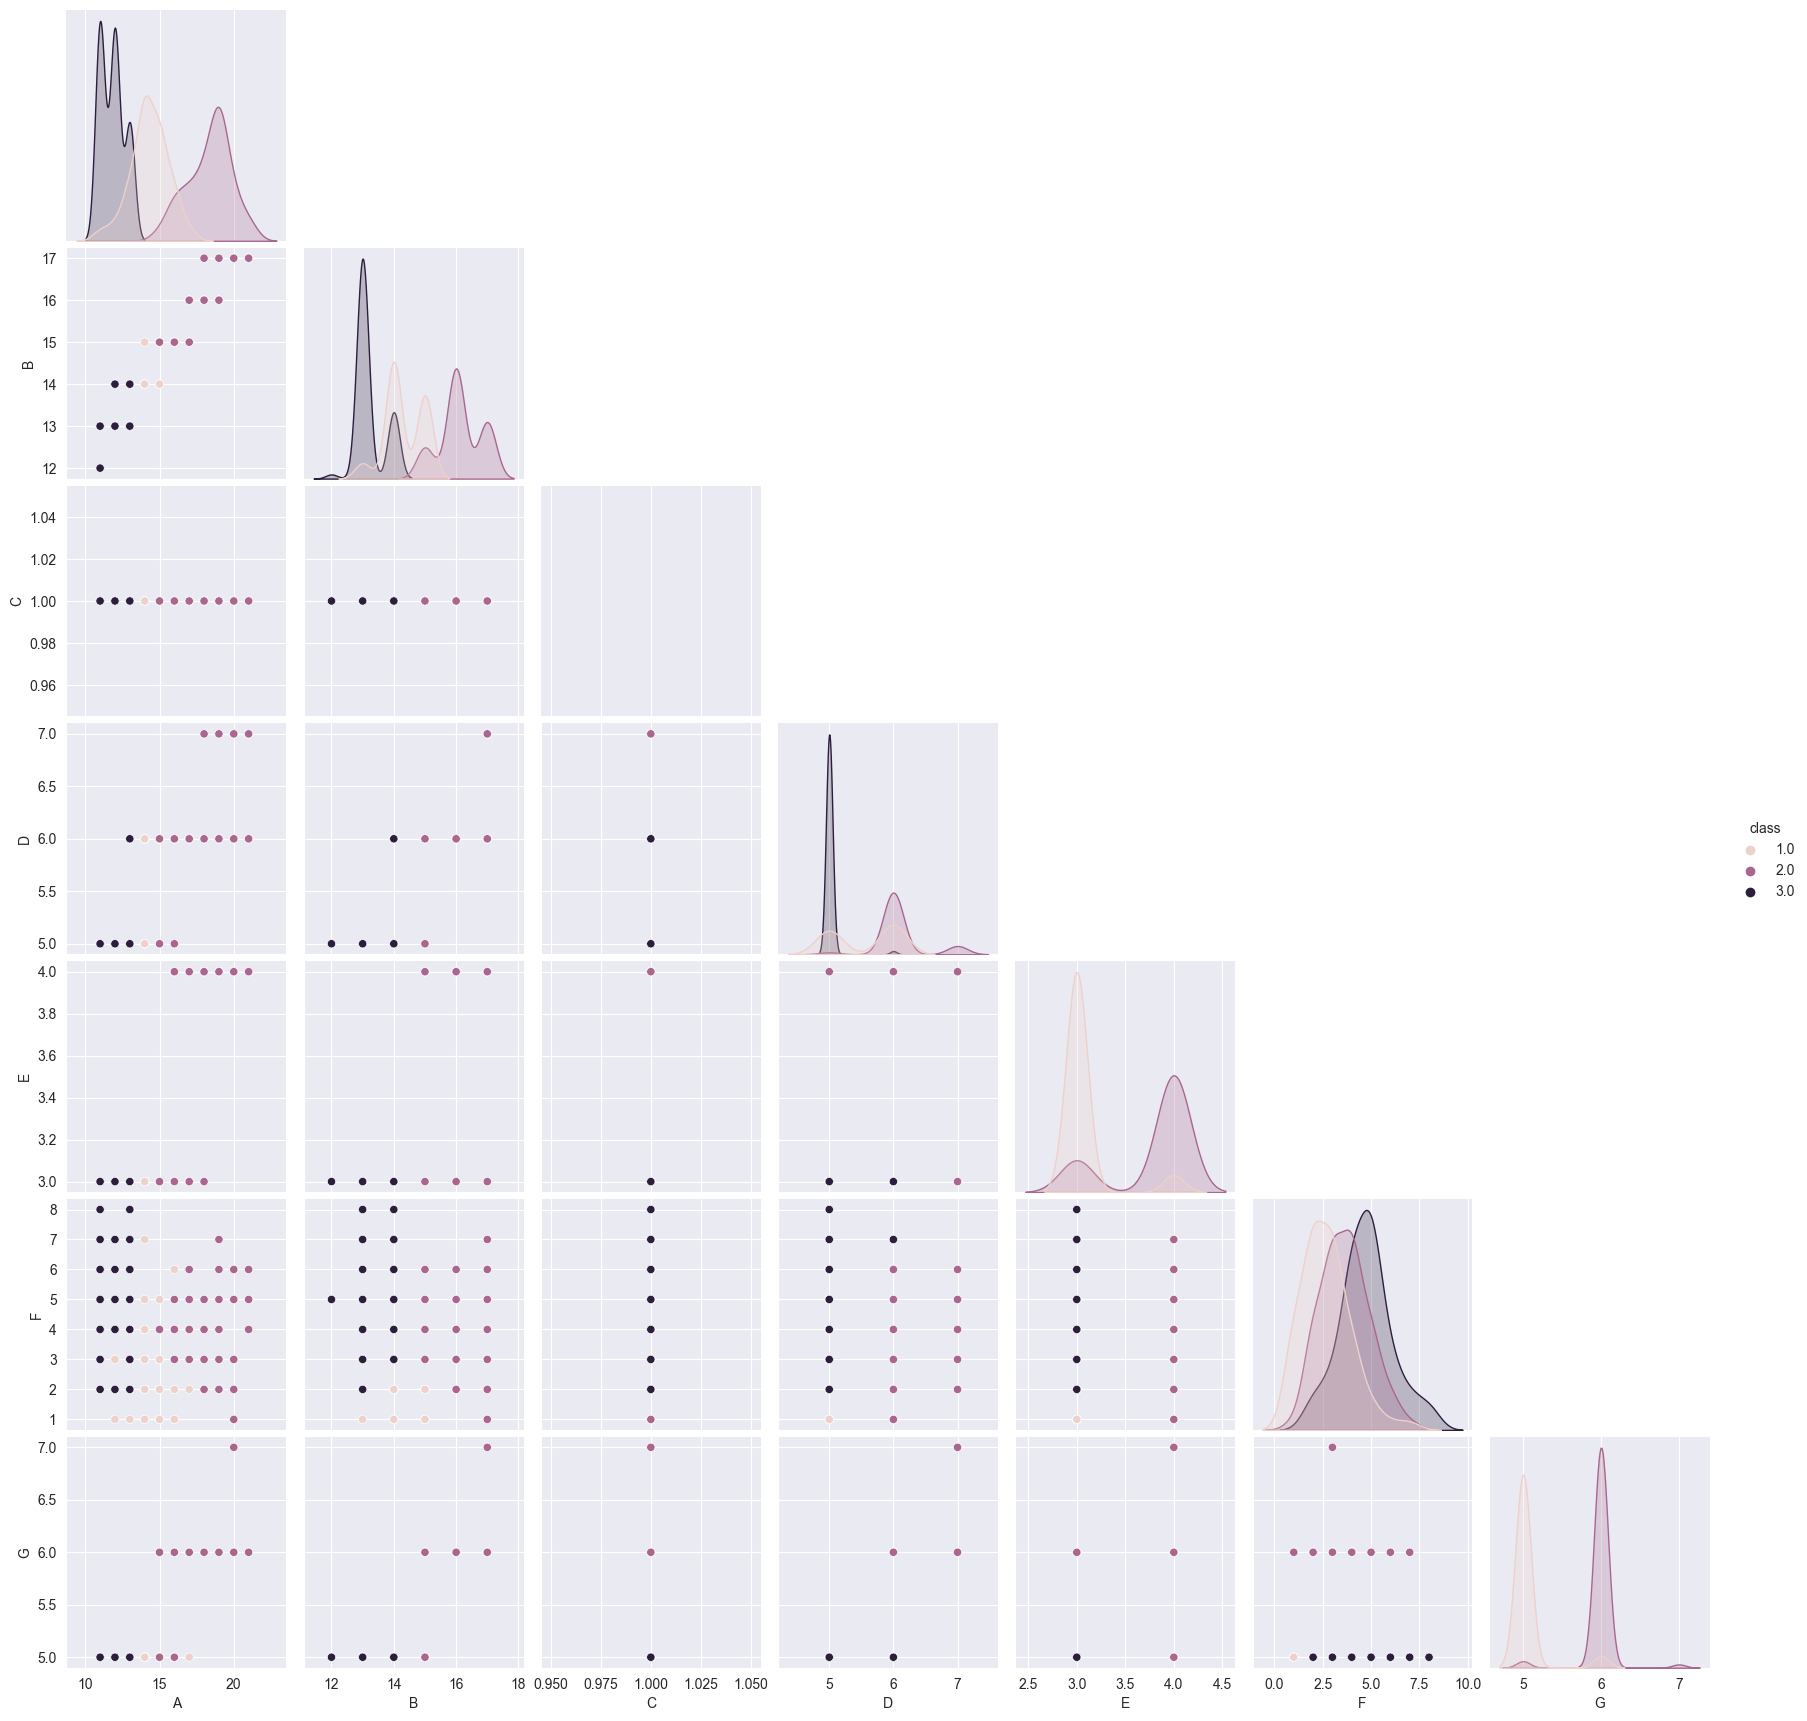

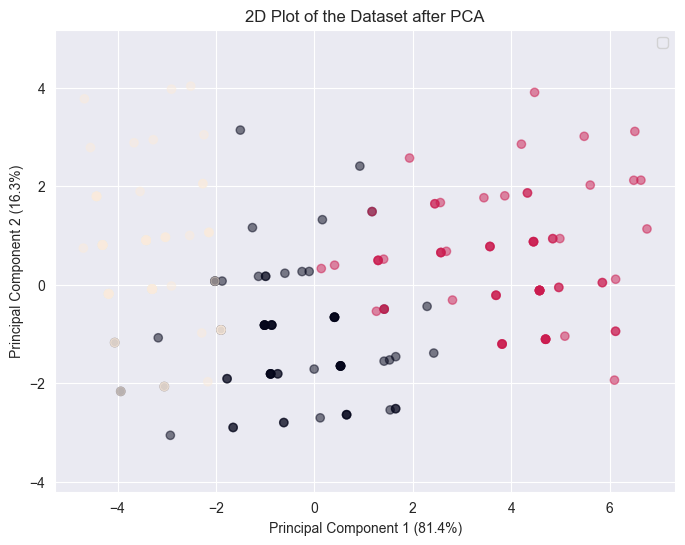

In [2]:
# fetch dataset
df = load_seeds()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
#Covariance matrix
# labels = np.unique(y['class'])
# cov_mat1 = np.cov(X[y['class'] == labels[0]].transpose())
# cov_mat2 = np.cov(X[y['class'] == labels[1]].transpose())
# cov_mat3 = np.cov(X[y['class'] == labels[2]].transpose())
# print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
# print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
# print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 220.87283195079002]
[2, 212.38082991083007]
[3, 210.9774416899841]
[4, 210.5676538669668]
[5, 210.36620132017663]
[6, 210.21869751244137]
[7, 210.0880709785326]
[8, 209.96763586131377]
[9, 209.85919489279257]
[10, 209.76558256241555]
[11, 209.68809983761506]
[12, 209.62619137435522]
[13, 209.57804683797127]
[14, 209.5413337048765]
[15, 209.51372016943793]
[16, 209.4931458110245]
[17, 209.4779133936919]
[18, 209.46668327727656]
[19, 209.45842620366744]
[20, 209.4523650570208]
[21, 209.4479197788903]
[22, 209.44466067168565]
[23, 209.44227101904337]
[24, 209.44051814974108]
[25, 209.43923149839384]
[26, 209.43828619163523]
[  0.         209.43828619 209.43828619]
[1, 220.87283195079002]
[2, 212.38082991083007]
[3, 210.97744168998403]
[4, 210.56765386696677]
[5, 210.36620132017663]
[6, 210.21869751244137]
[7, 210.08807097853258]
[8, 209.96763586131374]
[9, 209.85919489279257]
[10, 209.76558256241555]
[11, 209.688099837615]
[12, 209.62619137435522]
[13, 209.57804683797121]
[14, 209.541

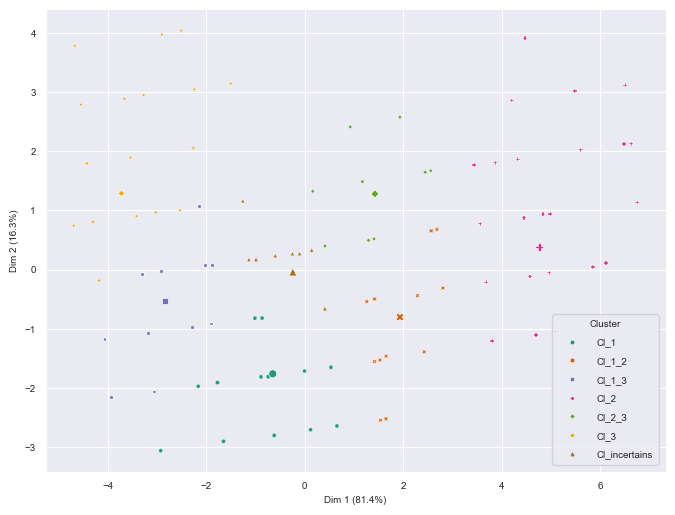

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.7140931000609465
Maximum Non-specificity value: 5.215295915931058
Minimum Non-specificity value: 0.5746991468667111
Average Non-specificity value: 1.8605891270014698


In [25]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=0.1, delta=29, ntrials=5)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red">There is an anonymous error with Upper bound/Lower bound plot function. There are some bugs in Python code of this function I think. I'll check it later</span>

## Feature weighted ECM (FW-ECM)

[1, 2.2006588363991044]
[2, 2.01324213200028]
[3, 1.9819313086507946]
[4, 1.9621510374749922]
[5, 1.9497053198683512]
[6, 1.942474706376212]
[7, 1.938350198657761]
[8, 1.9360257549561042]
[9, 1.934749652003373]
[10, 1.9340576806596241]
[11, 1.9336745222363425]
[12, 1.9334501093863476]
[13, 1.9333078638348922]
[14, 1.9332099537396619]
[15, 1.9331376658689052]
[16, 1.933081440650067]
[17, 1.9330361001429666]
[18, 1.9329986189494497]
[19, 1.9329670826102159]
[20, 1.9329401901181589]
[21, 1.9329170061644776]
[22, 1.9328968302217806]
[23, 1.9328791222830415]
[24, 1.9328634575282349]
[25, 1.932849496738705]
[26, 1.9328369659061306]
[27, 1.932825641585562]
[28, 1.932815340053157]
[29, 1.9328059091037888]
[30, 1.932797221745148]
[31, 1.9327891712893333]
[32, 1.9327816674935037]
[33, 1.932774633498955]
[34, 1.9327680033843222]
[35, 1.9327617201950942]
[36, 1.9327557343450215]
[37, 1.9327500023094337]
[38, 1.932744485548599]
[39, 1.9327391496128508]
[40, 1.932733963391442]
[41, 1.932728898474869

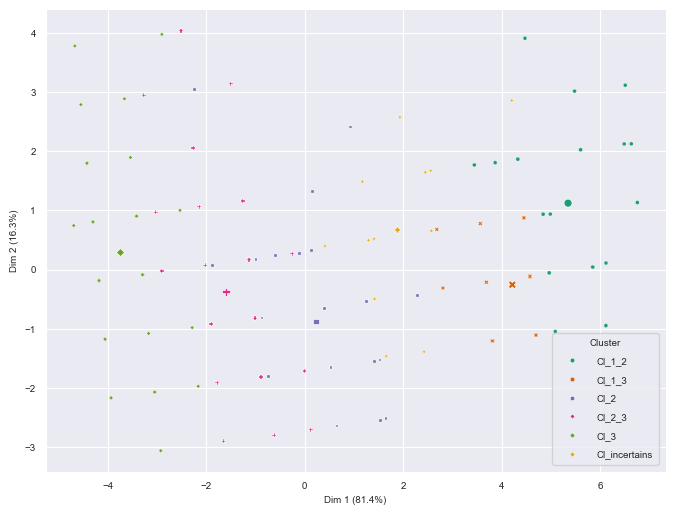

Weight matrix: 
 [[0.0181012  0.11396757 0.25027429 0.14675981 0.15865729 0.18805506
  0.12418477]
 [0.00985771 0.10732892 0.25081214 0.17019449 0.16677813 0.01056026
  0.28446834]
 [0.00216907 0.2774534  0.25475992 0.16409219 0.18895048 0.00042514
  0.11214979]]
Covariance Matrix 1: [1.21077441 0.25454545 0.         0.12659933 0.06868687 1.203367
 0.01818182]
Covariance Matrix 2: [2.39725877 0.44199561 0.         0.24989035 0.08585526 2.70482456
 0.14725877]
Covariance Matrix 3: [0.3886616  0.01694915 0.         0.         0.         2.07597896
 0.        ]


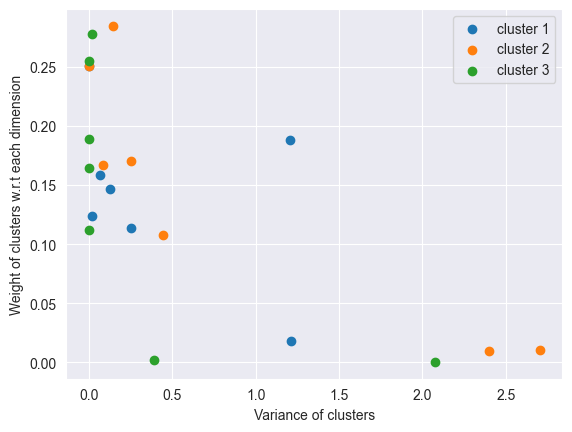

----------Feature weighted ECM----------
Adjusted Rand Index (ARI): 0.5405783674700867
Maximum Non-specificity value: 5.187380356979814
Minimum Non-specificity value: 0.6858310081907638
Average Non-specificity value: 1.942272772255907


In [22]:
# Feature weighted ECM clustering
c = 3
model = fwecm(x=X, c=c, beta=2, alpha=0.1, delta=29, ntrials=5, epsi=1e-6)

# ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label = "cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label = "cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label = "cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

#### <span style="color:red"> I have tried several times for Weight ECM and the highest ARI value I can get is around ~54.</span>

## Non-specificity equation
![test.png](assets/Non-specificity.png)